In [1]:
%matplotlib notebook

import matplotlib
import numpy as np
import seaborn as sns
import time
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation, PillowWriter
from numpy.random import default_rng

from astropy.table import Table
from astropy.io import fits
import astropy.cosmology
from astropy import units as u
from astropy.coordinates import SkyCoord

In [2]:
# First import everthing you need
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

# Create some random data, I took this piece from here:
# http://matplotlib.org/mpl_examples/mplot3d/scatter3d_demo.py
def randrange(n, vmin, vmax):
    return (vmax - vmin) * np.random.rand(n) + vmin
n = 100
xx = randrange(n, 23, 32)
yy = randrange(n, 0, 100)
zz = randrange(n, -50, -25)

<IPython.core.display.Javascript object>


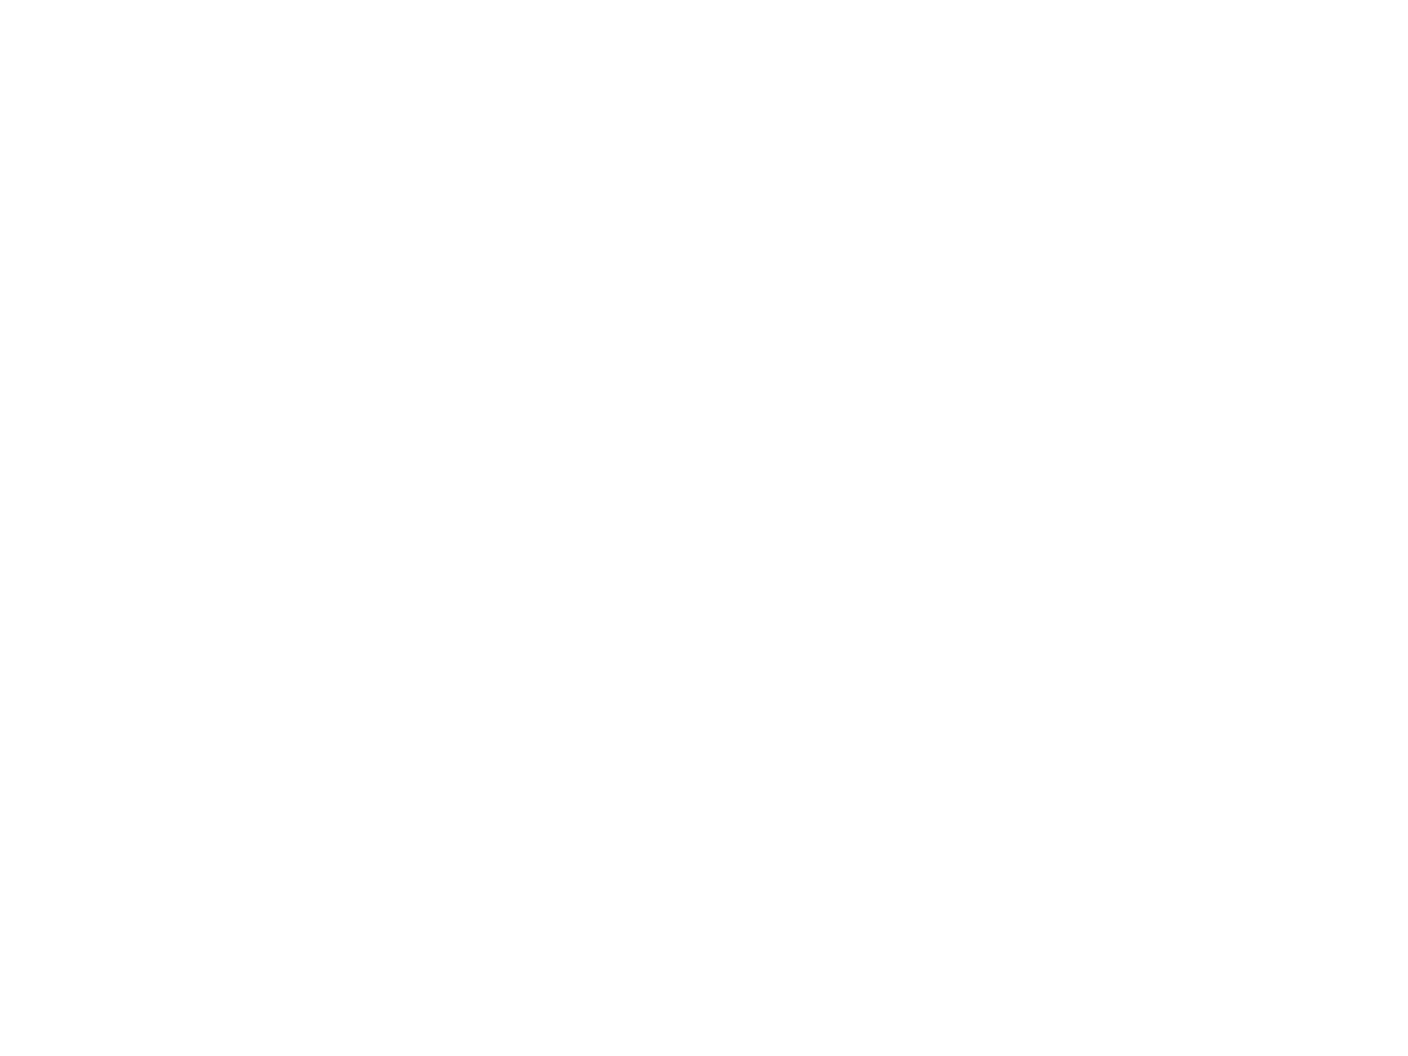

In [3]:
# Create a figure and a 3D Axes
fig = plt.figure()
ax = Axes3D(fig)

# Create an init function and the animate functions.
# Both are explained in the tutorial. Since we are changing
# the the elevation and azimuth and no objects are really
# changed on the plot we don't have to return anything from
# the init and animate function. (return value is explained
# in the tutorial.
def init():
    ax.scatter(xx, yy, zz, marker='o', s=20, c="goldenrod", alpha=0.6)
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)

In [5]:
# Save
#anim.save('plots/basic_animation.mp4', fps=30, writer='mencoder') #extra_args=['-vcodec', 'libx264'])
anim.save('../plots/animations/basic_animation.gif', writer=PillowWriter(fps=24))

# Functions

In [7]:
def pure_cut(table):
    
    idx_pure = np.where( (table['gaia_crf_source']==True) |
                         ((table['host_galaxy_flag']>0) & (table['host_galaxy_flag']<6)) |
                         (table['classlabel_dsc_joint']=='quasar') |
                         (table['vari_best_class_name']=='AGN') )[0]
    return idx_pure

In [8]:
def radec_to_cartesian(r, ra, dec):
    
    theta = ra * np.pi/180
    phi = (90 - dec) * np.pi/180

    x, y, z = spherical_to_cartesian(r, theta, phi)
    return np.array([x, y, z])

In [9]:
def spherical_to_cartesian(r, theta, phi):
    x       =  r*np.cos(theta)*np.sin(phi)
    y       =  r*np.sin(theta)*np.sin(phi)
    z       =  r*np.cos(phi)
    return np.array([x, y, z])

# Load in data

In [10]:
data_gaia = Table.read('../data/gaia_wise_panstarrs_tmass.fits.gz', format='fits')

In [11]:
idx_pure = pure_cut(data_gaia)
data = data_gaia[idx_pure]
len(data)

1942825

### Convert to cartesian

In [12]:
cosmo = astropy.cosmology.Planck15
dist = (cosmo.comoving_distance(data['redshift_qsoc'])*cosmo.h).value # convert to Mpc/h
data.add_column(dist, name='distance')

In [13]:
x, y, z = radec_to_cartesian(data['distance'], data['ra'], data['dec'])
data.add_column(x, name='x')
data.add_column(y, name='y')
data.add_column(z, name='z')

In [14]:
x.min(), x.max()

(-5744.725666598945, 5742.305667548721)

In [15]:
g_rp = np.array(data['phot_g_mean_mag']) - np.array(data['phot_rp_mean_mag'])
data.add_column(g_rp, name='g_rp')

In [16]:
g_rp.min(), g_rp.max()

(nan, nan)

Traceback (most recent call last):
  File "/Users/ksf/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/Users/ksf/miniconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


(array([1.00000e+00, 2.00000e+00, 3.00000e+00, 6.00000e+00, 1.20000e+01,
        1.30000e+01, 1.30000e+01, 1.50000e+01, 2.60000e+01, 4.30000e+01,
        4.70000e+01, 6.50000e+01, 7.40000e+01, 9.30000e+01, 1.33000e+02,
        2.04000e+02, 4.03000e+02, 1.27800e+03, 6.71600e+03, 7.41100e+04,
        5.57330e+05, 6.59353e+05, 3.09934e+05, 1.30814e+05, 6.43330e+04,
        4.00110e+04, 2.66340e+04, 1.88470e+04, 1.37210e+04, 1.06500e+04,
        8.12900e+03, 6.06200e+03, 4.62000e+03, 3.05800e+03, 1.87100e+03,
        9.81000e+02, 4.96000e+02, 2.56000e+02, 1.41000e+02, 6.90000e+01,
        4.30000e+01, 4.00000e+01, 2.40000e+01, 1.20000e+01, 1.60000e+01,
        8.00000e+00, 4.00000e+00, 0.00000e+00, 2.00000e+00, 5.00000e+00]),
 array([-3.0834599 , -2.9166698 , -2.7498798 , -2.5830896 , -2.4162996 ,
        -2.2495096 , -2.0827196 , -1.9159294 , -1.7491393 , -1.5823493 ,
        -1.4155592 , -1.2487692 , -1.081979  , -0.915189  , -0.74839896,
        -0.5816089 , -0.4148188 , -0.24802874, -0

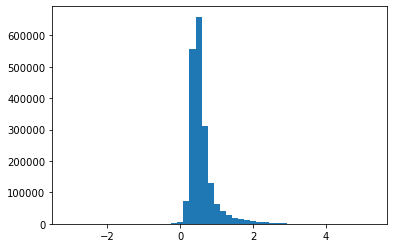

In [17]:
%matplotlib inline
plt.hist(g_rp,bins=50)

In [18]:
N_sub = 10000
idx_sub = np.random.randint(low=0, high=len(data), size=N_sub)
data_sub = data[idx_sub]

(-3000, 3000)

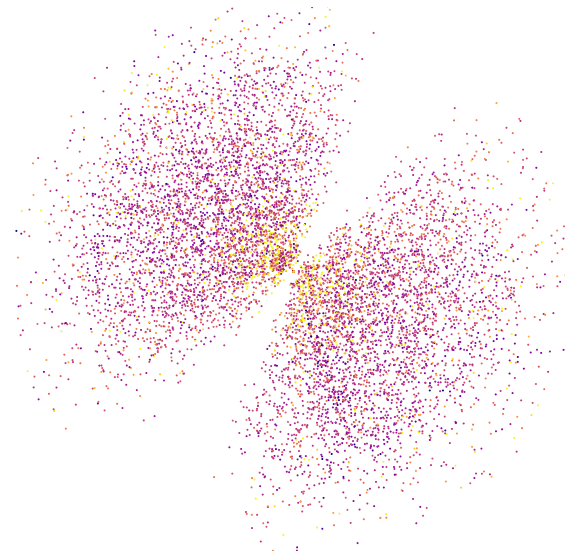

In [19]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
scat = ax.scatter(data_sub['x'], data_sub['y'], data_sub['z'], s=1, alpha=1, c=data_sub['g_rp'],
                  cmap='plasma', vmin=0, vmax=1)
ax.axis('off')

lim = 3000
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_zlim(-lim, lim)

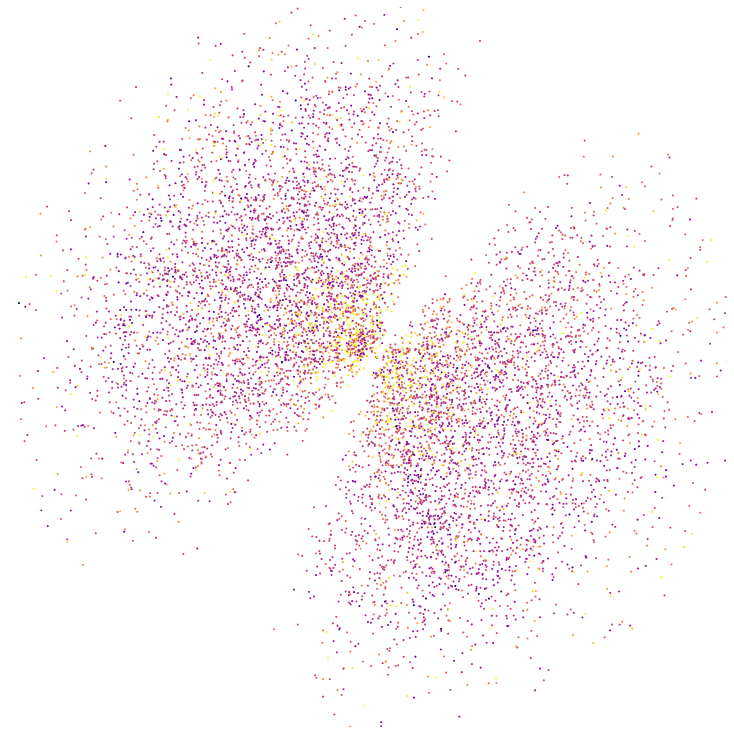

In [20]:
# Create a figure and a 3D Axes
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

# Create an init function and the animate functions.
# Both are explained in the tutorial. Since we are changing
# the the elevation and azimuth and no objects are really
# changed on the plot we don't have to return anything from
# the init and animate function. (return value is explained
# in the tutorial.
def init():
    #fig = plt.figure(figsize=(10,10))
    #ax = fig.add_subplot(projection='3d')
    scat = ax.scatter(data_sub['x'], data_sub['y'], data_sub['z'], s=1, alpha=1, c=data_sub['g_rp'],
                      cmap='plasma', vmin=0, vmax=1)
    ax.axis('off')

    lim = 3000
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)

In [21]:
#anim.save('../plots/animations/quasars_small.gif', writer=PillowWriter(fps=24)) #extra_args=['-vcodec', 'libx264'])

KeyboardInterrupt: 

In [ ]:
idx_zlow = np.where((data['redshift_qsoc'] < 1) &
                    (data['redshift_qsoc'] > 0))[0]
data_zlow = data[idx_zlow]
print(len(idx_zlow))

In [ ]:
# Create a figure and a 3D Axes
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

# Create an init function and the animate functions.
# Both are explained in the tutorial. Since we are changing
# the the elevation and azimuth and no objects are really
# changed on the plot we don't have to return anything from
# the init and animate function. (return value is explained
# in the tutorial.
def init():
    #fig = plt.figure(figsize=(10,10))
    #ax = fig.add_subplot(projection='3d')
    scat = ax.scatter(data_zlow['x'], data_zlow['y'], data_zlow['z'], s=0.01, alpha=0.1, c=data_zlow['g_rp'],
                      cmap='plasma', vmin=0, vmax=1)
    ax.axis('off')

    lim = 2000
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)
    ax.set_facecolor('black')
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)